# Método numérico para la solución de un pozo de potencial

Inicialmente usamos las siguientes librerias
1. **numpy**: Libreria para hacer cálculos matemáticos.
2. **matplotlib**: Librería para hacer diferentes tipos de gŕaficas.
3. **seaborn**: Librería mejoras en diseño de matplotlib.
4. **scipy.linalg**: Librería de métodos numéricos en este caso para solucionar ecuaciones de algebra lineal, en este caso usaremos eigh_tridiagonal que soluciona por métodos numéricos el problema de eigenvalores y eigenvectores dada una matrix tridiagonal mediante la eliminación Gaussiana.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy.linalg import eigh_tridiagonal 

Definimos el tipo de potencial; en este caso un potencial que vale $-83$ $eV$ entre $2$ $fm$ y $4$ $fm$. Para efectos de normalización tomamos que el potencial es diferente de cero entre 0.25 y 0.50 (siendo un valor adimensional).Es de aclara que el valor del potencial en zonas distintas es igual a $0$ $eV$.

In [3]:
def potential(x, V_o):
    if x >= 0.25 and x <= 0.50:
        return V_o
    else:
        return 0


Ahora construimos una función para obtener La energia (la cual está normalizada) y los estados:

In [112]:
def solucion_energia_estado(h, y, alpha, potential, V_o):
    
    traza= []
    for i in range(len(y)):
        traza.append((1/(h**2)) + alpha*potential(y[i], V_o))
    traza = traza[1:-1]
    diagonal_sup_inf = (-1/(h**2))*np.ones(len(traza)-1)
    
    return eigh_tridiagonal(traza, diagonal_sup_inf)


Luego bajo la discretización de $y$, tomamos 1000 valores en una región de $0$ a $1$, y definimos también el incremento $h=\frac{1-0}{n}$. También definimos el valor de la masa del electrón, L siendo la constante de normalización que en este caso es el ancho de estudio de nuestro sistema $8$ $fm$. Recordemos que la función en $x=0$ $fm$ y $x=8$ $fm$ vale 0, también definivos el valor del potencial. 

In [194]:
n = 1000
h = 1/n
y = np.linspace(0,1,n)
x = np.linspace(0,8,n)
m = 0.510998e6 #ev/c²
L = 8e-15
h_bar = 6.582e-16
alpha = m*(L**2)/(h_bar**2)
V_o = -83  #eV

Luego de definidos los anteriores valores, obenemos los estados y las energias normalizadas, y luefo desnormalizamos la energía dividiendola por $\frac{mL^2}{\hbar^2}$:

In [217]:
energias_prima, estados = solucion_energia_estado(h, y, alpha, potential, V_o)
energias = energias_prima/alpha

Graficammos la función de onda para T=0,1,10 y sus respectivas distribuciones de probabilidad,mediante **lineplot()**. En este caso la región roja es donde existe

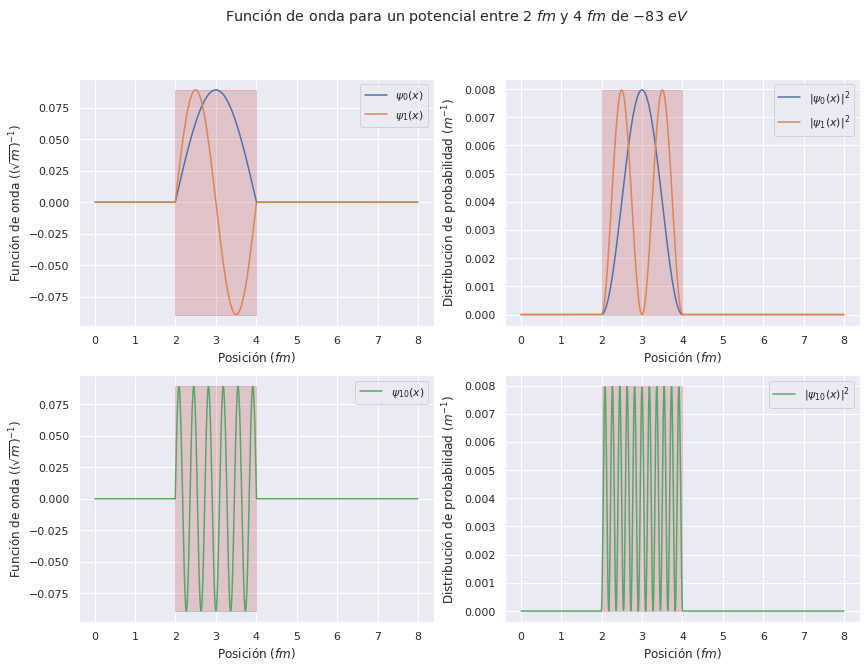

In [321]:
fig, ax = plt.subplots(2, 2,figsize=(14, 10))
fig.suptitle("Función de onda para un potencial entre $2$ $fm$ y $4$ $fm$ de $-83$ $eV$")
ax[0,0].fill_between([2, 4], min((estados.T[1])), max((estados.T[1])),color='r', alpha=0.25)
ax[0,1].fill_between([2, 4], min((estados.T[1])**2), max((estados.T[1]**2)),color='r', alpha=0.25)
ax[1,0].fill_between([2, 4], min((estados.T[10])), max((estados.T[10])),color='r', alpha=0.25)
ax[1,1].fill_between([2, 4], min((estados.T[10])**2), max((estados.T[10]**2)),color='r', alpha=0.25)
sns.lineplot(ax=ax[0,0], x=x[1:-1],y=(estados.T[0]), label = "$\psi_{0} (x)$")
sns.lineplot(ax=ax[0,0], x=x[1:-1],y=(estados.T[1]), label = "$\psi_{1} (x)$")
sns.lineplot(ax=ax[1,0], x=x[1:-1],y=(estados.T[10]), label = "$\psi_{10} (x)$", color="g")
sns.lineplot(ax=ax[0,1], x=x[1:-1],y=(estados.T[0]**2), label = "$|\psi_{0}(x)|^2$")
sns.lineplot(ax=ax[0,1], x=x[1:-1],y=(estados.T[1]**2), label = "$|\psi_{1}(x)|^2$")
sns.lineplot(ax=ax[1,1], x=x[1:-1],y=(estados.T[10]**2), label = "$|\psi_{10}(x)|^2$",color="g")
ax[0,0].set(ylabel=r'Función de onda ($(\sqrt{m})^{-1}$)', xlabel = r'Posición ($fm$)')
ax[1,0].set(ylabel=r'Función de onda ($(\sqrt{m})^{-1}$)', xlabel = r'Posición ($fm$)')
ax[0,1].set(ylabel=r'Distribución de probabilidad ($m^{-1}$)', xlabel = r'Posición ($fm$)')
ax[1,1].set(ylabel=r'Distribución de probabilidad ($m^{-1}$)', xlabel = r'Posición ($fm$)')

plt.show()

Luego, Graficamos los primeros 10 niveles de energía (Observen que tiene sentido que nos dé cercano a $-83$ $eV$ dado a lo explicado en el readme)

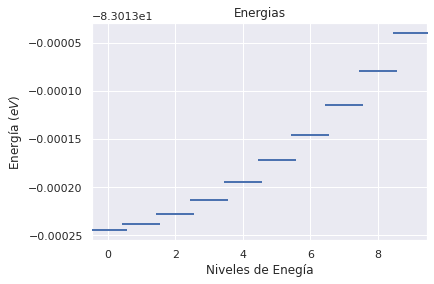

In [293]:
ax = sns.scatterplot(x=np.arange(0,10,1), y=energias[0:10], marker="_", s=1444, linewidth=2, zorder=3)
ax.set(xlabel='Niveles de Enegía', ylabel='Energía ($eV$)', title = "Energias")
plt.show()